In [17]:
import numpy as np
import os
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from library.model_training import model_training

In [5]:
import tensorflow as tf

print(tf.__version__)


tf.config.list_physical_devices('GPU') 

2.5.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
data_type = 'FordA'

def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

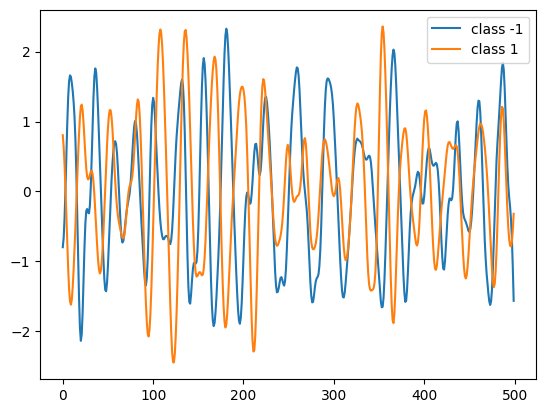

In [7]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [8]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [9]:
num_classes = len(np.unique(y_train))

In [10]:
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [11]:
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

In [12]:
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, shuffle=True, random_state=10)

In [13]:
now = dt.datetime.now()

MODEL_SAVE_FOLDER_PATH = "../../Model/CNN_feature_model/"+str(data_type)+'_'+str(now.year)+str(now.month)+str(now.day)+'_'+str(now.hour)+str(now.minute)+str(now.second)+'/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
    os.mkdir(MODEL_SAVE_FOLDER_PATH)

model_path = MODEL_SAVE_FOLDER_PATH + 'epoch_{epoch:02d}_{val_loss:.4f}.h5'
cd_checkpoint = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=0, save_best_only=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 500, 1)]     0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 500, 32)      64          input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 500, 32)      128         input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 500, 32)      192         input_1[0][0]                    
______________________________________________________________________________________________

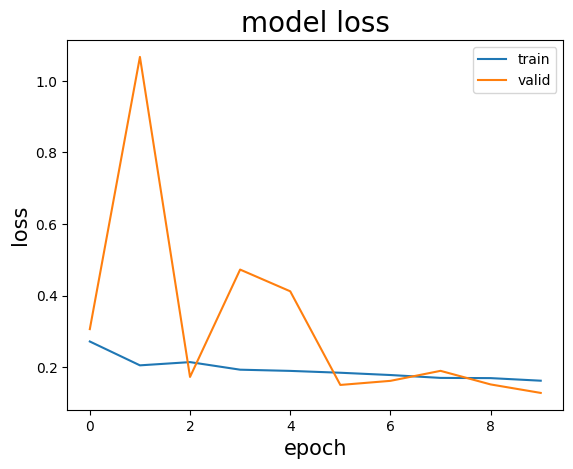

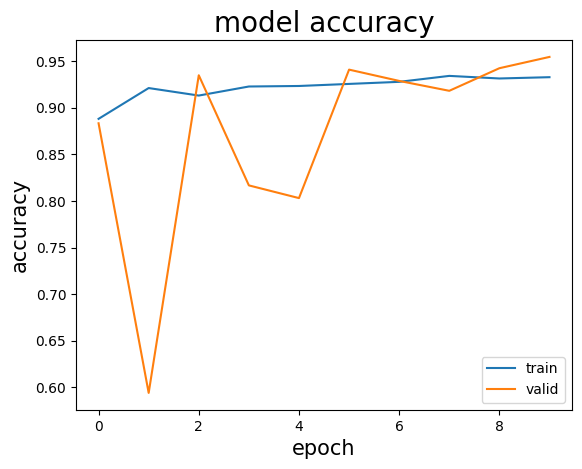

In [15]:
modelName = 'LITE'

train_model, train_history = model_training(modelName, x_train, y_train, x_valid, y_valid, 10, 16, MODEL_SAVE_FOLDER_PATH)

In [16]:
results = train_model.evaluate(x_test,  y_test)
print('Test accuracy: ', results[1])

21/21 [==============================] - 1s 13ms/step - loss: 0.1654 - acc: 0.9409
Test accuracy:  0.9409090876579285
